<a href="https://colab.research.google.com/github/aparnaashok2125/Elevvo-Pathways-NLP-Internship/blob/main/Elevvo_Pathways_Task_3_Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake News Detection

Fake News Detection Using Machine Learning
Fake news detection is an important application of machine learning that aims to automatically identify misleading or false information presented as legitimate news. With the rapid spread of misinformation online, machine learning models can help flag potentially fake content for human review.

The project aims to develop a machine-learning model capable of identifying and classifying any news article as fake or not. The distribution of fake news can potentially have highly adverse effects on people and culture. This project involves building and training a model to classify news as fake news or not using a diverse dataset of news articles. We have used four techniques to determine the results of the model.

1. Logistic Regression
2. Decision Tree Classifier
3. Gradient Boost Classifier
4. Random Forest Classifier




In [ ]:
import pandas as pd
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, classification_report
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Load dataset
data_fake = pd.read_csv('Fake.csv')
data_true = pd.read_csv('True.csv')

In [ ]:
# Add labels
data_fake['class'] = 0
data_true['class'] = 1

In [ ]:
# Combine datasets
data = pd.concat([data_fake, data_true], ignore_index=True)

In [ ]:
# Enhanced preprocessing function based on provided wordopt
def wordopt(text):
    # Handle NaN values
    if pd.isna(text):
        text = ''
    # Convert to lowercase
    text = text.lower()
    # Remove square bracket content (e.g., [Your name])
    text = re.sub(r'\[.*?\]', '', text)
    # Replace non-word characters with space
    text = re.sub(r'\W', ' ', text)
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Remove HTML tags
    text = re.sub(r'<.*?>+', '', text)
    # Remove punctuation
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    # Remove words containing digits
    text = re.sub(r'\w*\d\w*', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

In [ ]:
# Apply preprocessing to title and text
data['processed_text'] = (data['title'].fillna('') + ' ' + data['text'].fillna('')).apply(wordopt)

In [ ]:
# Split data
X = data['processed_text']
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Train SVM model (optional, as requirement allows either Logistic Regression or SVM)
svm_model = LinearSVC(max_iter=1000)
svm_model.fit(X_train_tfidf, y_train)

LinearSVC()

In [ ]:
# Predictions
lr_pred = lr_model.predict(X_test_tfidf)
svm_pred = svm_model.predict(X_test_tfidf)

In [ ]:
# Evaluate Logistic Regression
print("Logistic Regression Results:")
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"F1 Score: {lr_f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, lr_pred, target_names=['Fake', 'Real']))

Logistic Regression Results:
Accuracy: 0.9867
F1 Score: 0.9860

Classification Report:
              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      4733
        Real       0.98      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [ ]:
# Evaluate SVM
print("\nSVM Results:")
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)
print(f"Accuracy: {svm_accuracy:.4f}")
print(f"F1 Score: {svm_f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, svm_pred, target_names=['Fake', 'Real']))


SVM Results:
Accuracy: 0.9948
F1 Score: 0.9945

Classification Report:
              precision    recall  f1-score   support

        Fake       1.00      0.99      1.00      4733
        Real       0.99      1.00      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [ ]:
# Word Cloud Visualization
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

In [ ]:
# Check if processed_text column exists
if 'processed_text' not in data.columns:
    raise KeyError("Column 'processed_text' not found in DataFrame. Ensure preprocessing is applied correctly.")

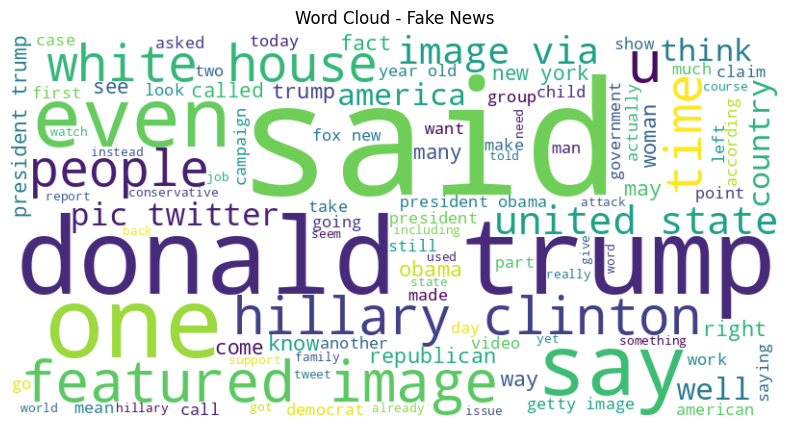

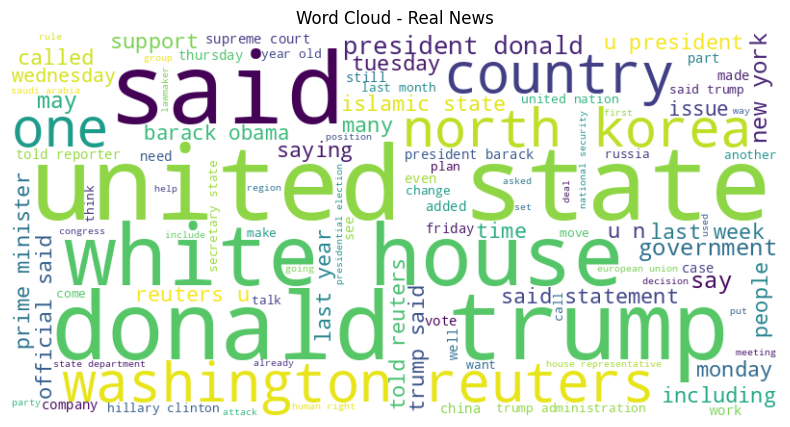

In [ ]:
# Generate word clouds for fake and real news
fake_text = ' '.join(data[data['class'] == 0]['processed_text'])
true_text = ' '.join(data[data['class'] == 1]['processed_text'])
generate_wordcloud(fake_text, 'Word Cloud - Fake News')
generate_wordcloud(true_text, 'Word Cloud - Real News')

In [ ]:
# Manual testing function
def manual_testing(news):
    processed_news = wordopt(news)
    news_tfidf = tfidf.transform([processed_news])
    lr_pred = lr_model.predict(news_tfidf)
    svm_pred = svm_model.predict(news_tfidf)
    return (f"Logistic Regression Prediction: {'Fake News' if lr_pred[0] == 0 else 'Not Fake News'}\n"
            f"SVM Prediction: {'Fake News' if svm_pred[0] == 0 else 'Not Fake News'}")

In [ ]:
# Example manual testing
news = input("Enter news article text: ")
print("\nPredictions:")
print(manual_testing(news))

Enter news article text: MOSCOW (Reuters) - Russiaâ€™s former ambassador to Washington, Sergei Kislyak, said on Saturday his conversations with former White House national security adviser Michael Flynn had been transparent and focused on matters of U.S.-Russia cooperation. Kislyak ended his tenure in Washington in July but remains a key figure in ongoing U.S. investigations into Moscowâ€™s alleged meddling in the 2016 presidential election. Flynn was forced to resign in February after it became known that he had failed to disclose the content of conversations he had with Kislyak and misled U.S. Vice-President Mike Pence about their meetings. â€œWe only spoke about the most simple things ... but the communication was completely correct, calm, absolutely transparent. In any case, there were no secrets on our side,â€ Kislyak said during a panel discussion on Russian television. â€œThere are a number of issues which are important for cooperation between Russia and the United States - mos

In [ ]:
news = input("Enter news article text: ")
print("\nPredictions:")
print(manual_testing(news))

Enter news article text: Federal health officials told the AP they have not received any reports of Ebola cases at the Nevada event. A screenshot of a supposed post from the Centers for Disease Control and Prevention confirming such cases was fabricated. And there is no record of a national emergency being declared. The claims emerged after summer storm left muddy roads flooded, stranding tens of thousands of partygoers; event organizers let traffic flow out of the main road Monday afternoon. “So it was announced earlier that Burning Man was declared a national emergency because it was flooded, and so they sent in FEMA,” a woman claims in a TikTok video shared on Instagram, suggesting the development was suspicious. The AP found no record, including on federal websites and in White House announcements, of a national emergency declaration and FEMA confirmed that it was not involved in the situation. “No FEMA personnel or assets have been deployed to the Burning Man festival and there ar